In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/unique-categories.csv
input/unique-categories.sorted-by-count.csv
input/summer-products-with-rating-and-performance_2020-08.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as px 
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data_frame=pd.read_csv("input/summer-products-with-rating-and-performance_2020-08.csv")

In [4]:
#Fill the missing values in the rating columns with 0
data_frame.isnull().any()
data_frame['rating_five_count']=data_frame['rating_five_count'].fillna(0)
data_frame['rating_four_count']=data_frame['rating_four_count'].fillna(0)
data_frame['rating_three_count']=data_frame['rating_three_count'].fillna(0)
data_frame['rating_two_count']=data_frame['rating_two_count'].fillna(0)
data_frame['rating_one_count']=data_frame['rating_one_count'].fillna(0)

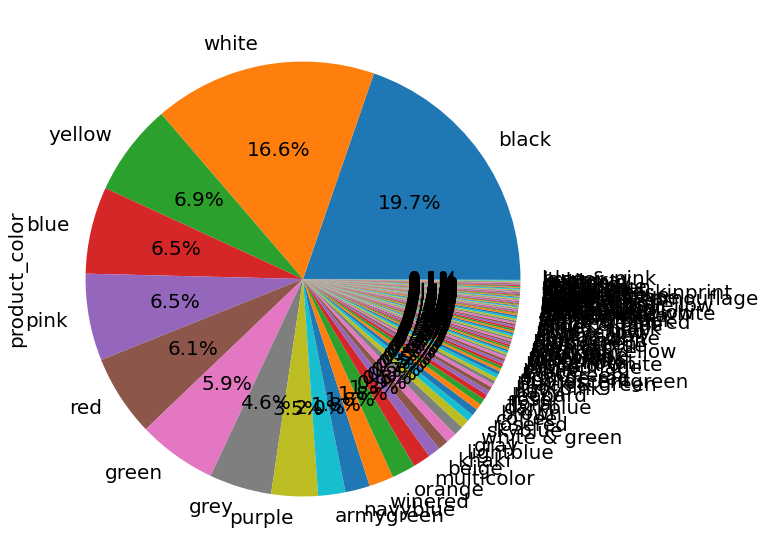

In [5]:
#Products Main Color

bin_percent = data_frame['product_color'].value_counts(normalize=True) * 100
plt.rcParams['font.size'] = 20.0
plot = bin_percent.plot.pie(y='bins', figsize=(10,10), autopct='%1.1f%%')

In [6]:
# Black and White are more frequent
# Replace the missing values with black or white

data_frame['product_color']=data_frame['product_color'].fillna(random.choice(["white","black"]))


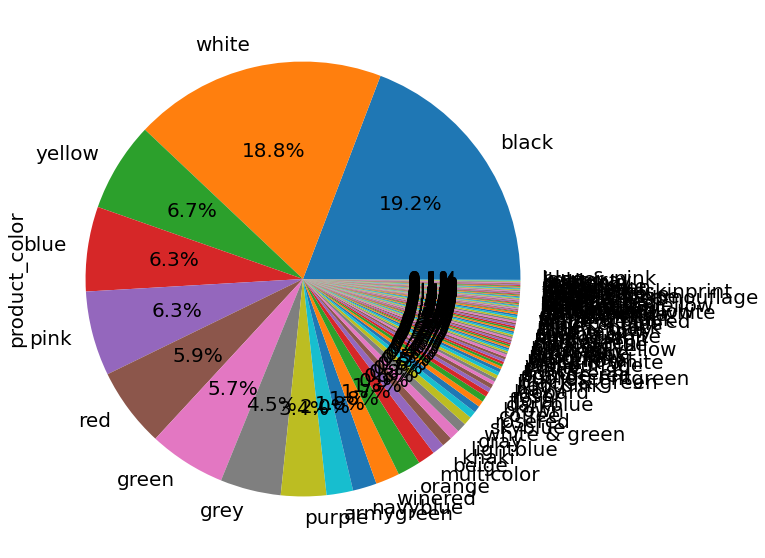

In [7]:
bin_percent = data_frame['product_color'].value_counts(normalize=True) * 100
plt.rcParams['font.size'] = 20.0
plot = bin_percent.plot.pie(y='bins', figsize=(10,10), autopct='%1.1f%%')

In [8]:
data_frame['product_color'] = LabelEncoder().fit_transform(data_frame['product_color'])
data_frame['product_color'].isnull().any()

False

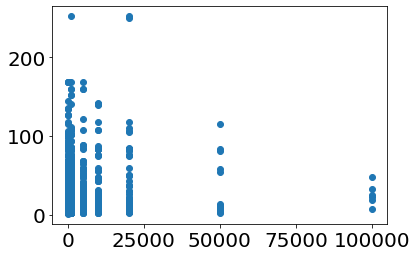

In [9]:
# Retail Price of the product vs Sales
plt.scatter(x=list(data_frame['units_sold']), y=list(data_frame['retail_price']))

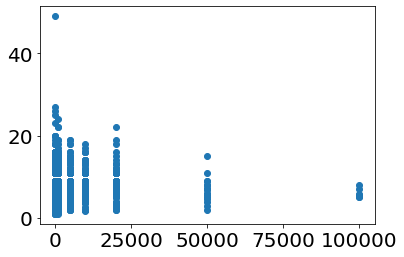

In [10]:
#Price of the Product vs Sales
plt.scatter(x=list(data_frame['units_sold']), y=list(data_frame['price']))

In [11]:
# Rounding off the Rating values to its neares integer
data_frame['rating']=data_frame['rating'].round()
data_frame['rating'].describe()

count    1573.000000
mean        3.827082
std         0.553135
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

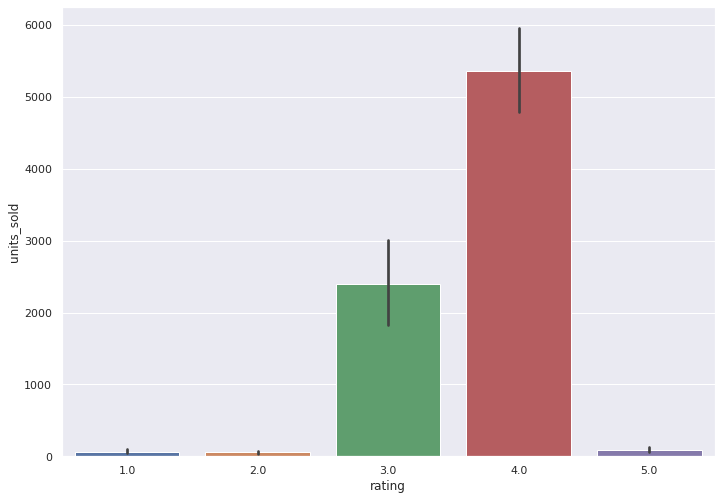

In [12]:
# Product ratings vs sales 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'rating',y = 'units_sold',data = data_frame)

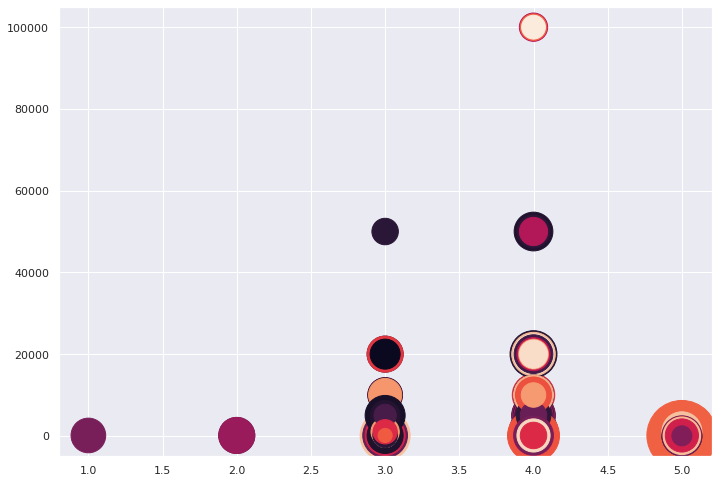

In [13]:
# ( Rating & price) vs Sales
colors = np.random.rand(1573) 
plt.scatter(x=list(data_frame['rating']), y=list(data_frame['units_sold']),s=list(data_frame['price'] *100),c=colors)

In [14]:
data_frame['badges_count'].values.tolist()
data_frame['badges_count'].round()

0       0
1       0
2       0
3       0
4       0
       ..
1568    0
1569    0
1570    0
1571    0
1572    0
Name: badges_count, Length: 1573, dtype: int64

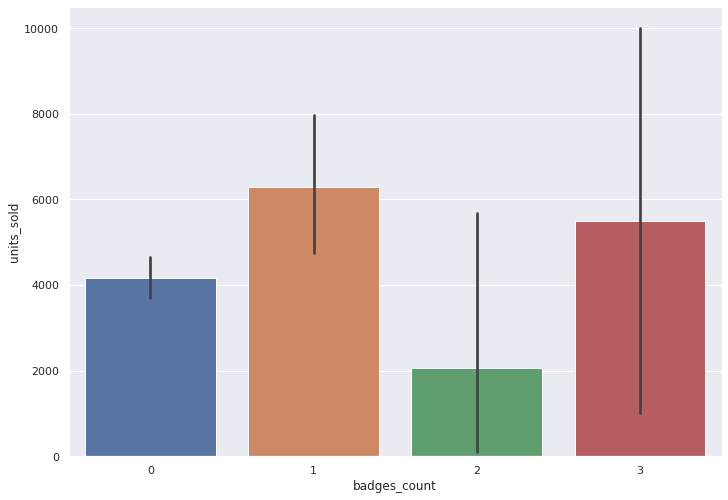

In [15]:
# Influence of Badge Counts on Sales
sns.barplot(x = 'badges_count',y = 'units_sold',data = data_frame)

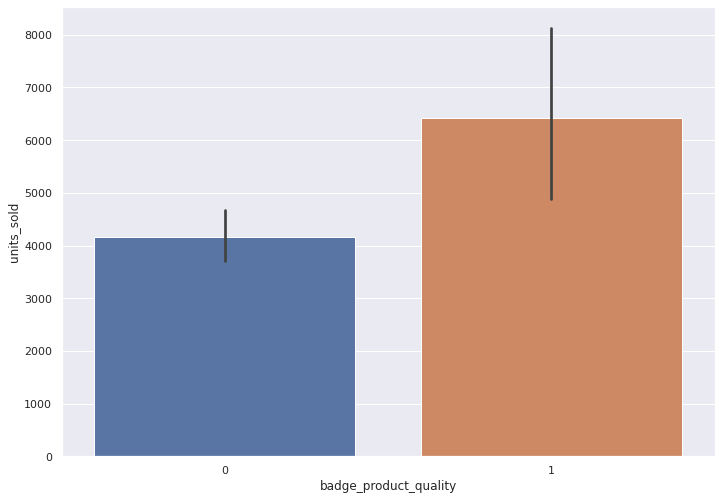

In [16]:
#Influence of Quality of the products in sales
sns.barplot(x = 'badge_product_quality',y = 'units_sold',data = data_frame)

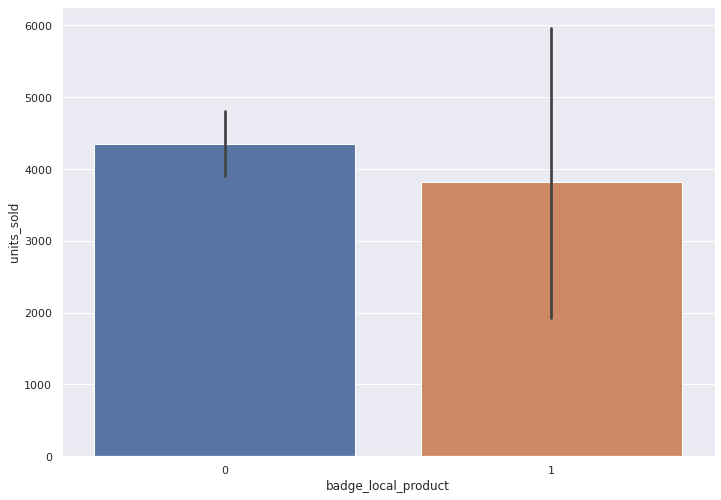

In [17]:
# Sales of local products
sns.barplot(x = 'badge_local_product',y = 'units_sold',data = data_frame)

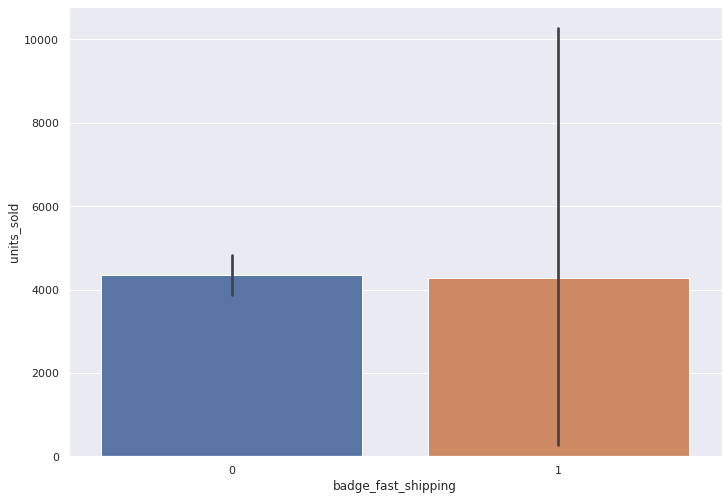

In [18]:
# Influence of Shipping time on sales
sns.barplot(x = 'badge_fast_shipping',y = 'units_sold',data = data_frame)

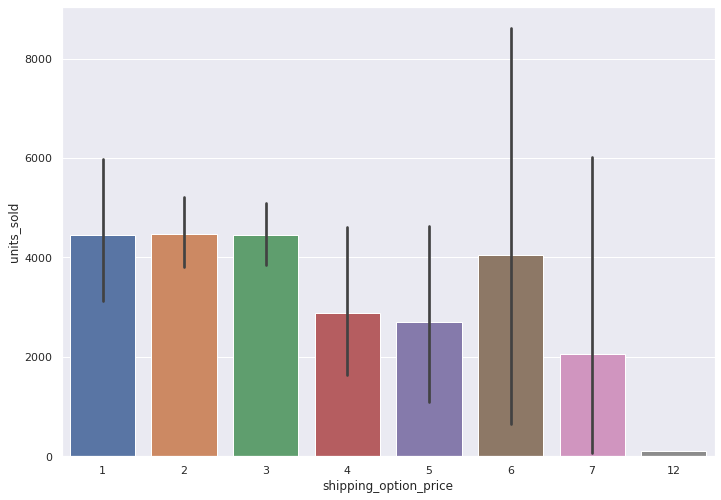

In [19]:
sns.barplot(x = 'shipping_option_price',y = 'units_sold',data = data_frame)

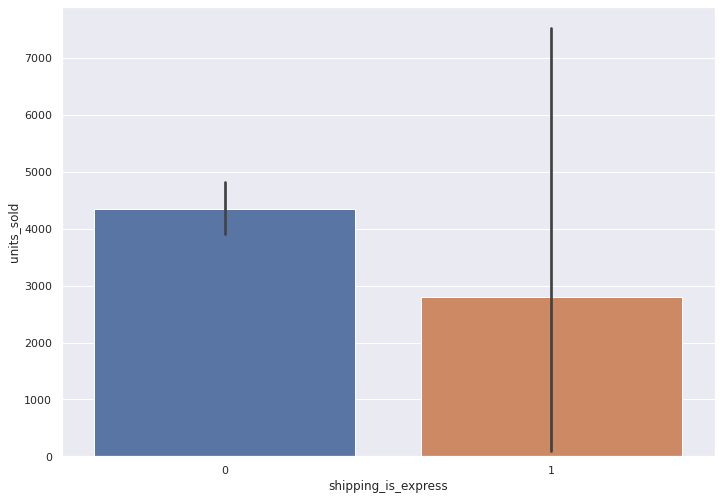

In [20]:
sns.barplot(x = 'shipping_is_express',y = 'units_sold',data = data_frame)

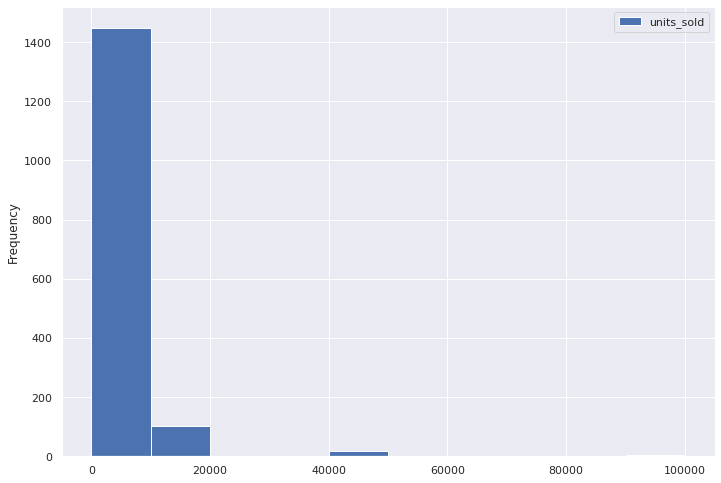

In [21]:
data_frame['merchant_rating_count']=round(data_frame['merchant_rating_count'], -4)
data_frame.plot( x='merchant_rating_count', y='units_sold', kind='hist')



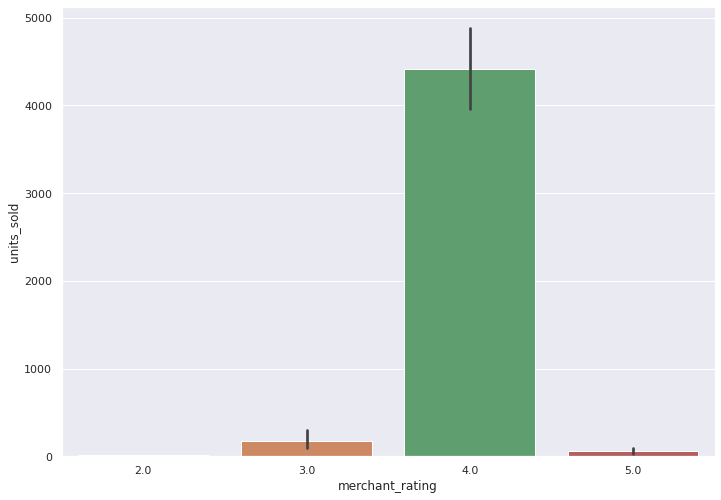

In [22]:
data_frame['merchant_rating']=data_frame['merchant_rating'].round()
sns.barplot(x = 'merchant_rating',y = 'units_sold',data = data_frame)

In [23]:

for ind in data_frame.index:
    size=data_frame['product_variation_size_id'][ind]

    if  size=="s" or size =="XS" or size=="M" or size =="XXS" or size=="L" or size =="S"or size =="XL" or size =="XXL"or size=="XXXL":
        if size=="s" or size=="S":
            data_frame['product_variation_size_id'][ind]="S"
        else:
            data_frame['product_variation_size_id'][ind]=size
    else:
        data_frame['product_variation_size_id'][ind]="Other"


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


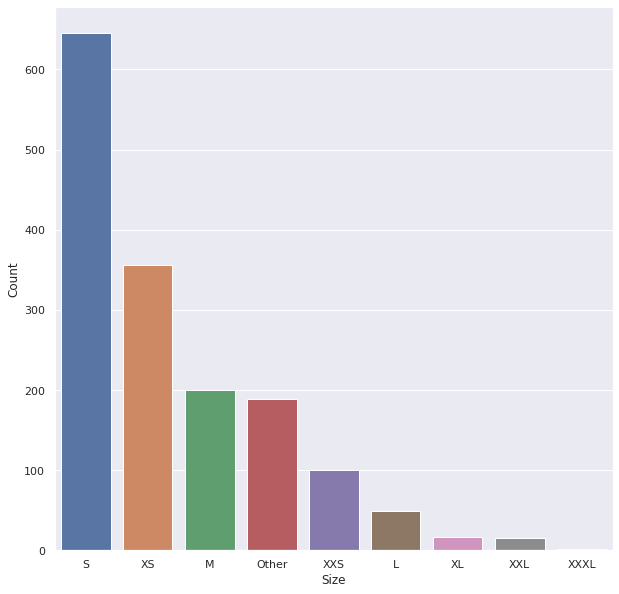

In [24]:
data_frame['product_variation_size_id']=data_frame['product_variation_size_id'].fillna('Other')
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = data_frame['product_variation_size_id'].value_counts().index,
              data = data_frame)
ax.set(xlabel='Size', ylabel='Count')
plt.show()
plt.show()

In [25]:
data_frame['product_variation_size_id'] = LabelEncoder().fit_transform(data_frame['product_variation_size_id'])
data_frame['currency_buyer'] = LabelEncoder().fit_transform(data_frame['currency_buyer'])
data_frame['countries_shipped_to'] = LabelEncoder().fit_transform(data_frame['countries_shipped_to'])

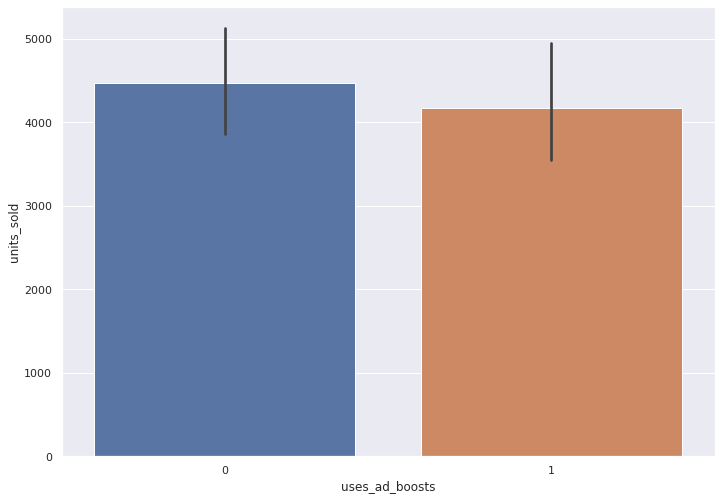

In [26]:
#data_frame['uses_ad_boosts'].isnull().any()
sns.barplot(x = 'uses_ad_boosts',y = 'units_sold',data = data_frame)

In [27]:
data_features=["price","retail_price","currency_buyer","uses_ad_boosts","rating","rating_count","badges_count",
              "badge_local_product","badge_product_quality","badge_fast_shipping","product_color"
              ,"product_variation_size_id","shipping_option_price","shipping_is_express","countries_shipped_to"
              ,"merchant_rating_count","merchant_rating"]
X_data=data_frame[data_features]
Y_data=data_frame['units_sold']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,test_size = 0.2)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
model_RF=RandomForestRegressor(n_estimators=10000)
model_RF.fit(X_train,y_train)
y_pred=model_RF.predict(X_test)
r2_score(y_pred,y_test)

0.8109607352581661

In [30]:
from sklearn.tree import DecisionTreeClassifier

model_DTC = DecisionTreeClassifier(random_state = 2)
model_DTC.fit(X_train, y_train)

y_pred= model_DTC.predict(X_test)
accuracy_score(y_test, y_pred)

0.7396825396825397

In [31]:
from xgboost import XGBRegressor
model_XGB=XGBRegressor()
model_XGB.fit(X_train,y_train)
y_pred=model_XGB.predict(X_test)
r2_score(y_pred,y_test)

0.8557499233764224

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
model_ABC = AdaBoostClassifier(RandomForestClassifier(random_state = 2),learning_rate = 0.01,random_state = 2) 
model_ABC.fit(X_train, y_train)

y_pred = model_ABC.predict(X_test)
accuracy_score(y_test, y_pred)

0.7714285714285715

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier(random_state = 2)
model_GBC.fit(X_train, y_train)

y_pred = model_GBC.predict(X_test)
accuracy_score(y_test, y_pred)

0.7587301587301587